# Numerical evaluation of the deflection of the beam
Number (code) of assignment: 5R4

Description of activity: H2 & H3

Report on behalf of:

name  : Pieter van Halem
student number (4597591)

name : Dennis Dane
student number (4592239)



Data of student taking the role of contact person:

name  : Pieter van Halem

email address  : pietervanhalem@hotmail.com

# Function definition

In the first block are all the packages imported and constants defined. In the second block are all the functions for the numerical analyses  defined. And the third block contains the two function for the bisect method. This is used in assignment 2.13.

In [1]:
import numpy as np
import scipy.sparse.linalg as sp_lg
import scipy.sparse as sp
import scipy as scp
import numpy.linalg as lg
import matplotlib.pyplot as plt
%matplotlib inline

EI = 2 * 10 ** 11 * (1/12) * 0.04 * 0.2 ** 3
L = 10
s = 2
xleft = 0.0
xright = L
yleft = 0.0
yright = 0.0
g = 9.8

In [2]:
def A(h, N): 
    d0 = np.ones(N)
    d1 = np.ones(N-1)
    d2 = np.ones(N-2)
    A = (6*np.diag(d0,0) + -4*np.diag(d1,-1) + -4*np.diag(d1,1) + 1*np.diag(d2,-2) + 1*np.diag(d2,2))
    A[0,0] = 5
    A[N-1,N-1] = 5
    return A * EI/(h ** 4)

def beig(h,N,x,yleft,yright, qM):
    result = qM*np.ones(N)
    return result 

def bm(h,N,x,yleft,yright, qm):
    result = np.zeros(N)
    if(((L/2-s/2)/h).is_integer() == True):
        for i in range(int((L/2-s/2)/h - 1),int((L/2+s/2)/h)):
            if (i==int((L/2-s/2)/h - 1) or i == int((L/2+s/2)/h - 1)):
                result[i] = result[i] + qm/2
            else:
                result[i] = result[i] + qm
    return result 

def bn(h,N,x):
    result = np.zeros(N)
    for i in range(int((L/2-s/2)/h -1),int((L/2+s/2)/h -1)):
        result[i] = result[i] + 125 * np.pi* g * np.sin(np.pi*((h*(i+1)-4)/2))
    return result
    

def solve(h,N,x,yleft,yright, k, qM, qm):
    AA = A(h,N)
    if k == 1:
        bb = beig(h,N,x,yleft,yright, qM)
    elif k == 2:
        bb = bm(h,N,x,yleft,yright, qm)
    elif k==3:
        bb = beig(h,N,x,yleft,yright, qM)
        bb = bb + bm(h,N,x,yleft,yright, qm)
    elif k == 4:
        bb = beig(h,N,x,yleft,yright, qM)
        bb = bb + bn(h,N,x) 
    y = lg.solve(AA,bb)
    result = np.concatenate(([yleft],y,[yright]))
    return result

def main(N, k, qM = 611.52, qm = 2450.0):
    h = (xright  - xleft)/(N+1)
    x = np.linspace(xleft,xright,N+2)                                 
    y = solve(h,N,x,yleft,yright,k, qM, qm)
    return x,y

def plot(x,y):
    plt.figure("Boundary value problem")
    plt.plot(x,y,"k")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("De graph of the function y")
    plt.legend("y", loc="best")
    
def table(x,y,N):    
    print ("{:>4}{:>11}{:>21}".format("k", "x_k", "y(x_k)"))
    for k in range(0, N+2):
        print ("{:4.0f}{:11.2f}{:23.7e}".format(k, x[k], y[k]))

In [3]:
def func(qm):
    N = 199
    x,y = main(N, 3,611.52, qm)
    return np.max(y) - 0.03

def bisection(func, x1, x2, tol=0.01, nmax=10):
    i = 0
    for i in range(nmax):
        xm = (1/2)*(x1 + x2)
        fm = func(xm)
        if func(xm) * func(x2) <= 0:
            x1 = xm
        else:
            x2 = xm
        i += 1
        if np.abs(func(x1)) < tol:
            break    
    if i == nmax:
        a = str('Warning: the nmax is exeeded')
        print(a)
    return x1

# Assignment 2.11
Choose $h=1.0$ as grid size and make a table f the obtained numerical   approximation of y. The table must give the deflection in 8-digit floating point format.

In [4]:
N = 9
x,y = main(N, 3)
table(x,y,len(y)-2)

   k        x_k               y(x_k)
   0       0.00          0.0000000e+00
   1       1.00          1.0357069e-02
   2       2.00          1.9738792e-02
   3       3.00          2.7284486e-02
   4       4.00          3.2248125e-02
   5       5.00          3.3998344e-02
   6       6.00          3.2248125e-02
   7       7.00          2.7284486e-02
   8       8.00          1.9738792e-02
   9       9.00          1.0357069e-02
  10      10.00          0.0000000e+00


# Assignment 2.12
Take $h=0.05$. Compute both $y$ and $yeig$. plot the obtained approximation of y as a function of x. plot $yeig$ in the same picture, distinguishing the different graphs visually. Where is the maximal deflection attain? With values take y and yeig at the midpoint of the beam?

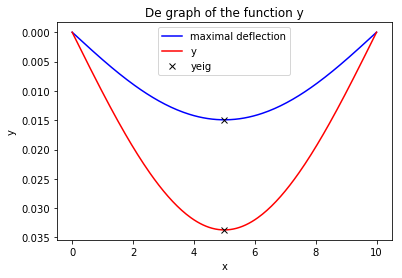

The maximal deflection of yeig occurs at: x= 5.0
The maximal deflection of y occurs at: x= 5.0

The deflection in the midpoint of the beam is: yeig(5)= 1.4929986e-02
The deflection in the midpoint of the beam is: y(5)= 3.3707370e-02


In [5]:
N = 199
x,y = main(N, 1)
x2,y2222 = main(N, 3)
plt.figure("Boundary value problem")
plt.plot(x,y,"b", x2,y2222,"r")
plt.plot(x[np.argmax(y)],np.max(y),"xk", x2[np.argmax(y2222)],np.max(y2222),"xk")
plt.xlabel("x")
plt.ylabel("y")
plt.title("De graph of the function y")
plt.legend({"yeig","y", "maximal deflection"}, loc="best")
plt.gca().invert_yaxis()
plt.show()

print("The maximal deflection of yeig occurs at: x=",x[(np.argmax(y))])
print("The maximal deflection of y occurs at: x=",x2[(np.argmax(y2222))])
print()
print("The deflection in the midpoint of the beam is: yeig(5)= {:.7e}".format(np.max(y)))
print("The deflection in the midpoint of the beam is: y(5)= {:.7e}".format(np.max(y2222)))


# assignment 2.13
Determine the maximal mass $m$ allowed for, i.e. the mass leading to a deflection in the midpoint of the beam with a magnitude 0.03 (see original goal, formulated at the beginning of the assignment).

In [6]:
qmopt = bisection(func, 1000, 30000, tol = 1e-15, nmax = 100)

In [7]:
x,y = main(N, 3, qm =  qmopt)
qmopt = qmopt*2/g
ymaxx = np.max(y)
print("The max value for m is:{:.7e}[kg] the deflection for this m is:{:.7e}".format(qmopt, ymaxx))
print("The truncation error is smaller than: 1e-15")

The max value for m is:4.0128099e+02[kg] the deflection for this m is:3.0000000e-02
The truncation error is smaller than: 1e-15


The maximal load $m$ is obtained with the bisect method. In this method we choose a tolerance of $1e-15$, such that the error is not visible in this notebook. We choose the Bisect method because it always converges. We couldn’t use the Newton Raphson method because the derivatives of the function are not known.

the defined functions are given in $ln[3]$

# Assignment 2.14
Determine $Am$ such that the total additional mass is again 500 kg. sketch the original load $qm$, i.e. (6) with m = 500, and the load qm in one figure.

To determine the value of Am we need to solve the following equation:

$$\int_{L/2-s/2}^{L/2+s/2} (Am*\sin(\pi*\frac{x-(L/2-s/2)}{s})) dx = 500$$

solving this equation results in:

$$ \frac{4}{\pi}Am = 500$$

$$ Am = 125\pi$$

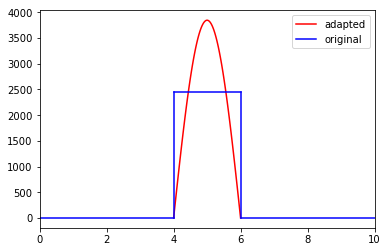

In [8]:
x = np.linspace(4,6,100)
x2 = 4*np.ones(100)
x3 = 6*np.ones(100)
x4 = np.linspace(0,4,100)
x5 = np.linspace(6,10,100)
y1 = (500 * g / s)*np.ones(100)
y2 = 125 * np.pi* g * np.sin(np.pi*((x-4)/2))
y3 = np.linspace(0,500 * g / s,100)
y4 = np.zeros(100)

plt.plot(x,y2, 'r', x,y1, 'b', x2,y3,'b',x3,y3,'b', x4,y4,'b',x5,y4,'b')
plt.legend({"original","adapted"}, loc="best")
plt.xlim(0, 10);

# Assignment 2.15 
Determine (using $h = 0.05$) the maximal deflection of the beam with the new load. Check whether this value is significantly different from the one obtained in exercise 12.

In [9]:
N=199
x,y = main(N, 4)
print("y(L/2) = {:.7e}".format(np.max(y)))
print("y2(L/2)-y1(L/2) = {:.7e} [m] = {:.7e} %".format(np.max(y) - np.max(y2222),(np.max(y) - np.max(y2222))/np.max(y) * 100 ) )

y(L/2) = 3.3853569e-02
y2(L/2)-y1(L/2) = 1.4619928e-04 [m] = 4.3185782e-01 %


The deflection increases with approximately 0.14 mm with is 0.43% witch is not significant. However it is very logical that the deflection increases. because the load concentrates more in the centre, a larger moment is caused. This increases the deflection of the beam.